In [65]:
import pandas as pd
import matplotlib.pyplot as plt

path = 'data/dataset_TSMC2014_NYC.txt' # New York City
data = pd.read_csv(path,sep='\t',header=None,
    names=['uid','vid','vcid','vc_name','lat','long','timezone_offset','utc_time'])
# user_id, venue_id, venue_category_id, venue_category_name, latitude, longitude, timezone_offset_in_minutes, UTC_time
data.head()

,uid,vid,vcid,vc_name,lat,long,timezone_offset,utc_time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


In [66]:
def big_vc_name(name:str):
    if 'Restaurant' in name or name in ['BBQ Joint','Fish & Chips Shop','Fried Chicken Joint','Salad Place',
    'Steakhouse','Breakfast Spot','Burrito Place','Sandwich Place','Ramen /  Noodle House','Burger Joint',
    'Taco Place', 'Hot Dog Joint','Wings Joint','Soup Place','Pizza Place','cafe','Diner','Mac & Cheese Joint']: 
        return 'Restaurant'
    elif name in ['Deli / Bodega','Snack Place','Ice Cream Shop','Candy Store',
    'Bagel Shop','Food Truck','Cupcake Shop','Bakery','Donut Shop',
    'Dessert Shop','Food','Food & Drink Shop']:
        return 'Food & Snack'
    elif 'School' in name or name in ['College Academic Building','University',
    'Community College','College & University','General College & University','Student Center']:
        return 'School'
    elif name in ['College Stadium','Playground','Bowling Alley','Pool Hall','Ski Area',
    'Gym / Fitness Center','Stadium','Pool','Athletic & Sport']:
        return 'Place for Sports'
    elif name in ['Ferry','Bus Station','Light Rail','Train Station','Taxi','Airport','Subway']:
        return 'Transportation'
    elif 'Museum' in name or name in ['Public Art','Arts & Entertainment',
    'Historic Site','Arts & Crafts Store','Art Gallery','Sculpture Garden',
    'Music Venue','Antique Shop','Music Store','Thrift / Vintage Store']:
        return 'History, Museum & Arts'
    elif name in ['Nail Salon','Salon / Barbershop','Tanning Salon','Cosmetics Shop','Spa / Massage',
    'Tattoo Parlor']:
        return 'Beauty, Cosmetology & Hairdressing'
    elif name in ['Motorcycle Shop','Board Shop','Bike Rental / Bike Share',
    'Rental Car Location','Automotive Shop','Bike Shop']:
        return 'Vehicle Shop'
    elif name in ['Gas Station / Garage','Car Wash','Parking','Car Dealership']:
        return 'Vehicle-Related Place'
    elif name in ['Movie Theater','Comedy Club','Casino','Bar',
    'Tea Room','Other Nightlife','General Entertainment',
    'Nightlife Spot','College Theater','Performing Arts Venue','Theater',
    'Internet Cafe','Coffee Shop','Gaming Cafe',
    'Gastropub','Arcade','Beer Garden','Concert Hall']:
        return 'Indoor Entertainment'
    elif name in ['Racetrack','Harbor / Marina','Outdoors & Recreation','Zoo','Park','Aquarium',
    'Beach','Plaza','Other Great Outdoors','Scenic Lookout','Garden','Garden Center','Campground','River']:
        return 'Outdoor Entertainment'
    elif name in ['Spiritual Center','Church','Synagogue','Shrine','Mosque','Temple']:
        return 'Religion & Spirituality'
    elif name in ['Sorority House','Event Space','Fraternity House']:
        return 'Place for Socializing'
    elif name in ['Flea Market','Market','Fair','Department Store','Convenience Store','Mall']:
        return 'Store, Market & Fair'
    elif name in ['General Travel','Travel & Transport','Travel Lounge']:
        return 'Travel-Related Place'
    elif name in ['Jewelry Store','Clothing Store','Bridal Shop']:
        return 'Clothing & Jewelry'
    elif name in ['Drugstore / Pharmacy','Medical Center']:
        return 'Medical-Related Place'
    elif name in ['Pet Service','Pet Store','Animal Shelter']:
        return 'Pet-Related Place'
    elif name in ['Residential Building (Apartment / Condo)','Housing Development','Home (private)']:
        return 'Residence'
    elif name in ['Winery','Distillery','Brewery']:
        return 'Alcoholic-Related Place'
    elif name in ['Video Store','Gift Shop','Video Game Store','Toy / Game Store','Record Shop','Hobby Shop','Flower Shop']:
        return 'Shop Related to Entertainment'
    elif name in ['Planetarium','Bookstore','Library']:
        return 'General Education Place'
    elif name in ['Funeral Home','Cemetery']:
        return 'Funeral'
    elif name in ['Electronics Store','Camera Store','Mobile Phone Shop']:
        return 'Electronics'
    else: return name
data['big_vc_name']=[big_vc_name(name) for name in data.vc_name]
vc_to_dropped=['City','Building','Shop & Service','Photography Lab',
'Military Base','Road','Moving Target']
data=data.drop(data[data.vc_name.isin(vc_to_dropped)].index)
big_vc_names=sorted(list(set(data.big_vc_name)))

In [67]:
from datetime import datetime

def time_handler(t_str):
    t_list=t_str.split()
    # Fri Jun 01 17:04:42 +0000 2012
    return ' '.join([t_list[1],t_list[2],t_list[3],t_list[-1]])

data['utc_time_value']=[datetime.strptime(time_handler(t_str),'%b %d %H:%M:%S %Y') for t_str in data.utc_time]
data.head()

,uid,vid,vcid,vc_name,lat,long,timezone_offset,utc_time,big_vc_name,utc_time_value
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,"History, Museum & Arts",2012-04-03 18:00:09
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,Bridge,2012-04-03 18:00:25
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,Residence,2012-04-03 18:02:24
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,Medical-Related Place,2012-04-03 18:02:41
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,Food & Snack,2012-04-03 18:03:00


In [68]:
data_mpi = pd.read_csv("./data/dataset_TSMC2014_NYC_mpi.csv")
data_mpi = data_mpi.drop(data_mpi.iloc[:,[0]],axis=1)
mPIs = data_mpi.mean(axis=0)
med_mpi=mPIs.median()
prevalent_mpi=mPIs[mPIs>med_mpi]
prevalenet_mpi_df=prevalent_mpi.to_frame(name='average modified PI')
prevalent_colo=prevalenet_mpi_df.index.values
prevalent_colo=prevalent_colo[(prevalent_colo!='Recycling Facility') & (prevalent_colo!='Bridge')]
print(len(prevalent_colo),'\n',prevalent_colo)

22 
 ['Convention Center' 'Electronics' 'Factory' 'Food & Snack'
 'General Education Place' 'History, Museum & Arts' 'Hotel'
 'Indoor Entertainment' 'Medical-Related Place' 'Neighborhood' 'Office'
 'Outdoor Entertainment' 'Place for Sports' 'Residence' 'Rest Area'
 'Restaurant' 'School' 'Smoke Shop' 'Store, Market & Fair'
 'Transportation' 'Travel-Related Place' 'Vehicle-Related Place']


In [69]:
df = data.loc[data['big_vc_name'].isin(prevalent_colo)]
df = df[['uid','big_vc_name','utc_time_value']]
min_time=min(df['utc_time_value'])
minutes = df['utc_time_value'].apply(lambda t:(t-min_time).total_seconds()/60)
pdata = pd.DataFrame({'uid':df['uid'],'big_vc_name':df['big_vc_name'], 'minutes' : minutes})
pdata = pdata.sort_values(['uid','minutes'])
pdata['hours']=pdata['minutes'].apply(lambda t:t/60)
pdata.head()

,uid,big_vc_name,minutes,hours
2454,1,Restaurant,1771.366667,29.522778
3660,1,Restaurant,5742.250000,95.704167
5603,1,Indoor Entertainment,7220.333333,120.338889
5783,1,Restaurant,7322.016667,122.033611
6696,1,Restaurant,8540.716667,142.345278


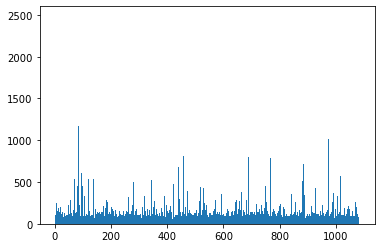

In [70]:
import matplotlib.pyplot as plt
plt.hist(pdata['uid'],bins=len(set(pdata['uid'])))
plt.show()

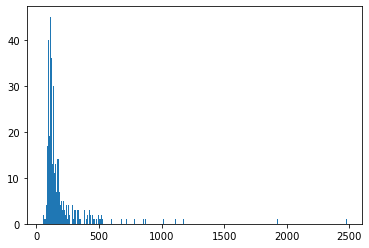

In [71]:
from collections import Counter
counts=Counter(pdata['uid']).most_common()
plt.hist([val for _,val in counts],bins=1000)
plt.show()

In [72]:
from statistics import mode,mean,median
arr=[val for _,val in counts]

print('min',min(arr))
print('mode',mode(arr))
print('mean',mean(arr))
print('median',median(arr))
print('max',max(arr))

min 46
mode 99
mean 183.44967682363804
median 134
max 2478


In [73]:
pdata.to_csv('data/dataset_TSMC2014_NYC_hawkes.csv')